# 데이터 전처리



In [ ]:
from google.colab import drive


drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
import requests
import time
import pandas as pd
import json


BASE_URL = "http://apis.data.go.kr/B551177/AviationStatsByAirport"
ENDPOINT = "/getTotalNumberOfPassenger"
API_KEY = "OBCOs5/ZyaMnNvGAvartv0tRq4DSGIIawEhfuEvknFKybK7qk04eL17/WuC3dJTL8K/nkityFMUc2VBr8voC+A=="
HEADERS = {"Content-Type": "application/json"}


MAX_CALLS_PER_DAY = 1000
TPS = 50
TIME_DELAY = 1 / TPS


START_YEAR = 2009
END_YEAR = 2024


data = []


def fetch_monthly_data(year, month):
    params = {
        "serviceKey": API_KEY,
        "from_month": f"{year}{month:02d}",
        "to_month": f"{year}{month:02d}",
        "periodicity": "0",  # 정기편
        "domestic_foreign": "I",  # 국제선
        "passenger_type": "1",  # 유임 승객
        "type": "json",  # JSON 응답
    }
    try:
        response = requests.get(BASE_URL + ENDPOINT, params=params, headers=HEADERS)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {year}-{month}: {e}")
        return None


calls_made = 0
for year in range(START_YEAR, END_YEAR + 1):
    for month in range(1, 13):
        if calls_made >= MAX_CALLS_PER_DAY:
            print("Daily API call limit reached.")
            break
        result = fetch_monthly_data(year, month)
        if result:

            result["year"] = year
            result["month"] = month
            data.append(result)
        calls_made += 1
        time.sleep(TIME_DELAY)


df = pd.json_normalize(data)
with open("/content/drive/My Drive/monthly_airport_passenger_data.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

df.to_csv("/content/drive/My Drive/monthly_airport_passenger_data.csv", index=False)
print("Data collection complete. Saved to 'monthly_airport_passenger_data.csv'")

In [ ]:

BASE_URL = "http://apis.data.go.kr/B551177/AviationStatsByAirline"
ENDPOINT = "/getTotalNumberOfPassenger"
API_KEY = "OBCOs5/ZyaMnNvGAvartv0tRq4DSGIIawEhfuEvknFKybK7qk04eL17/WuC3dJTL8K/nkityFMUc2VBr8voC+A=="
HEADERS = {"Content-Type": "application/json"}


MAX_CALLS_PER_DAY = 1000
TPS = 50
TIME_DELAY = 1 / TPS


START_YEAR = 2009
END_YEAR = 2024

data = []


def fetch_monthly_passenger_data(year, month):
    params = {
        "serviceKey": API_KEY,
        "from_month": f"{year}{month:02d}",
        "to_month": f"{year}{month:02d}",
        "periodicity": "0",
        "domestic_foreign": "I",
        "passenger_type": "1",
        "type": "json",
    }
    try:
        response = requests.get(BASE_URL + ENDPOINT, params=params, headers=HEADERS)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {year}-{month}: {e}")
        return None


calls_made = 0
for year in range(START_YEAR, END_YEAR + 1):
    for month in range(1, 13):
        if calls_made >= MAX_CALLS_PER_DAY:
            print("Daily API call limit reached.")
            break
        result = fetch_monthly_passenger_data(year, month)
        if result and "response" in result and "body" in result["response"] and "items" in result["response"]["body"]:
            items = result["response"]["body"]["items"]
            for item in items:
                item["year"] = year
                item["month"] = month
                data.append(item)
        calls_made += 1
        time.sleep(TIME_DELAY)


df = pd.json_normalize(data)
df.to_csv("monthly_airline_passenger_data.csv", index=False)
print("Data collection complete. Saved to 'monthly_airline_passenger_data.csv'")


In [ ]:
df.to_csv("/content/drive/My Drive/monthly_airline_passenger_data.csv", index=False)

In [ ]:
with open("/content/drive/My Drive/monthly_airline_passenger_data.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

In [ ]:
import pandas as pd
import json

json_file_path = '/content/drive/My Drive/monthly_airport_passenger_data.json'
with open(json_file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
processed_data = []


for entry in data:
    year = entry['year']
    month = entry['month']
    for item in entry['response']['body']['items']:
        processed_data.append({
            "year": year,
            "month": month,
            "airport": item['airport'],
            "arrPassenger": int(item['arrPassenger'].replace(',', '')),
            "depPassenger": int(item['depPassenger'].replace(',', '')),
            "passenger": int(item['passenger'].replace(',', ''))
        })

formatted_airport_data = pd.DataFrame(processed_data)


formatted_airport_data

In [ ]:
output_path = '/content/drive/My Drive/monthly_airport_passenger_data(2).json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
import json


input_file_path = "/content/drive/My Drive/monthly_airport_passenger_data.json"
output_file_path = "/content/drive/My Drive/converted_airport_data.json"


with open(input_file_path, 'r', encoding='utf-8') as f:
    airport_data = json.load(f)


converted_data = []

for entry in airport_data:
    year = entry["year"]
    month = entry["month"]
    items = entry["response"]["body"]["items"]

    for item in items:
        converted_data.append({
            "airport": item["airport"],
            "arrPassenger": int(item["arrPassenger"].replace(",", "")),
            "depPassenger": int(item["depPassenger"].replace(",", "")),
            "passenger": int(item["passenger"].replace(",", "")),
            "year": year,
            "month": month
        })

with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(converted_data, f, ensure_ascii=False, indent=4)


# 환율 데이터

# 분석 전 과정 + 상관관계 분석

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import ruptures as rpt
import matplotlib.pyplot as plt

exchange_rate_path = "/content/drive/My Drive/exchange_rate.csv"
airport_passenger_path = "/content/drive/My Drive/converted_airport_data.json"
airline_passenger_path = "/content/drive/My Drive/monthly_airline_passenger_data.json"


exchange_rate_data = pd.read_csv(exchange_rate_path)
airport_passenger_data = pd.read_json(airport_passenger_path)
airline_passenger_data = pd.read_json(airline_passenger_path)

In [ ]:

print("Airport")
print(airport_passenger_data.keys())
print(airport_passenger_data.iloc[0])

print("\nAirline")
print(airline_passenger_data.keys())
print(airline_passenger_data.iloc[0])

Airport
Index(['airport', 'arrPassenger', 'depPassenger', 'passenger', 'year',
       'month'],
      dtype='object')
airport             김포
arrPassenger     94597
depPassenger     91772
passenger       186369
year              2009
month                1
Name: 0, dtype: object

Airline
Index(['airline', 'airlineCode', 'arrPassenger', 'depPassenger', 'passenger',
       'year', 'month'],
      dtype='object')
airline         FedEX항공
airlineCode          FX
arrPassenger          0
depPassenger          0
passenger             0
year               2009
month                 1
Name: 0, dtype: object


In [ ]:
exchange_rate_data.rename(columns={'Year': 'year', 'Month': 'month'}, inplace=True)

airport_merged = pd.merge(airport_passenger_data, exchange_rate_data, on=['year', 'month'], how='left')

airline_merged = pd.merge(airline_passenger_data, exchange_rate_data, on=['year', 'month'], how='left')

In [ ]:
holiday_months = {
    1: [2009, 2012, 2014, 2017, 2020, 2023],
    2: [2010, 2011, 2013, 2015, 2016, 2018, 2019, 2021, 2022, 2024],
    9: [2010, 2011, 2013, 2014, 2015, 2016, 2018, 2019, 2021, 2022, 2023, 2024],
    10: [2009, 2012, 2017, 2020]
}

def is_holiday(year, month):
    return 1 if year in holiday_months.get(month, []) else 0
airport_merged['is_holiday'] = airport_merged.apply(lambda row: is_holiday(row['year'], row['month']), axis=1)
airline_merged['is_holiday'] = airline_merged.apply(lambda row: is_holiday(row['year'], row['month']), axis=1)

In [ ]:
airport_merged = airport_merged[
    (airport_merged['year'] < 2024) | ((airport_merged['year'] == 2024) & (airport_merged['month'] <= 10))
]

airline_merged = airline_merged[
    (airline_merged['year'] < 2024) | ((airline_merged['year'] == 2024) & (airline_merged['month'] <= 10))
]

In [ ]:
airline_merged['passenger']=airline_merged['passenger'].str.replace(",", "").astype(int)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

top_airports = airport_merged.groupby('airport')['passenger'].sum().nlargest(5).index.tolist()
top_airlines = airline_merged.groupby('airline')['passenger'].sum().nlargest(5).index.tolist()


filtered_airport = airport_merged[airport_merged['airport'].isin(top_airports)]
filtered_airline = airline_merged[airline_merged['airline'].isin(top_airlines)]


In [ ]:
filtered_airport

,airport,arrPassenger,depPassenger,passenger,year,month,USD,JPY,is_holiday
0,김포,94597,91772,186369,2009,1,"1,379.5","1,543.1",1
1,김해,99873,99095,198968,2009,1,"1,379.5","1,543.1",1
2,대구,5541,5798,11339,2009,1,"1,379.5","1,543.1",1
4,인천,1152742,1191985,2344727,2009,1,"1,379.5","1,543.1",1
5,제주,17336,17299,34635,2009,1,"1,379.5","1,543.1",1
...,...,...,...,...,...,...,...,...,...
1259,김포,176699,178599,355298,2024,10,"1,379.9",903.6,0
1260,김해,386579,381115,767694,2024,10,"1,379.9",903.6,0
1261,대구,59585,58494,118079,2024,10,"1,379.9",903.6,0
1263,인천,3032270,2970539,6002809,2024,10,"1,379.9",903.6,0


In [ ]:
top_airport_pivot = filtered_airport.pivot_table(
    index=['year', 'month'],
    columns='airport',
    values='passenger',
    aggfunc='sum'
)

top_airline_pivot = filtered_airline.pivot_table(
    index=['year', 'month'],
    columns='airline',
    values='passenger',
    aggfunc='sum'
)

top_airport_pivot = top_airport_pivot.fillna(0)
top_airline_pivot = top_airline_pivot.fillna(0)

correlation_matrix = pd.DataFrame(
    {airport: top_airline_pivot.corrwith(top_airport_pivot[airport]) for airport in top_airports},
    index=top_airlines
)

In [ ]:
print("Correlation Matrix between Airports and Airlines:")
print(correlation_matrix)

Correlation Matrix between Airports and Airlines:
              인천        김해        김포        제주        대구
대한항공    0.950137  0.913306  0.919113  0.783429  0.645407
아시아나항공  0.883243  0.836460  0.957956  0.779459  0.505326
제주항공    0.868556  0.883150  0.485209  0.659309  0.855082
진에어     0.869865  0.907961  0.488823  0.658378  0.865173
티웨이항공   0.763034  0.766857  0.325020  0.540491  0.787346


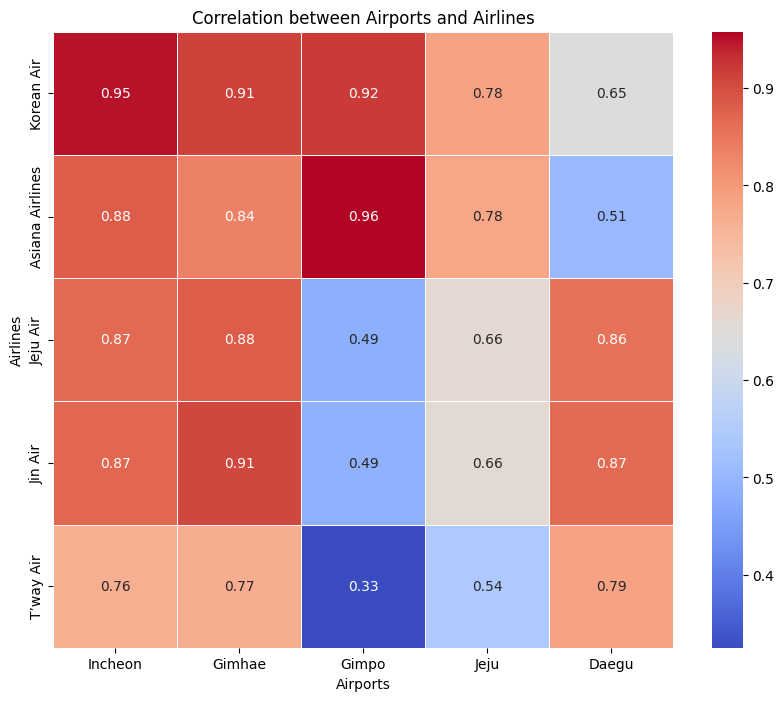

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import logging
import matplotlib

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

correlation_matrix_english = {
    'Incheon': {'Korean Air': 0.950137, 'Asiana Airlines': 0.883243, 'Jeju Air': 0.868556, 'Jin Air': 0.869865, 'T’way Air': 0.763034},
    'Gimhae': {'Korean Air': 0.913306, 'Asiana Airlines': 0.836460, 'Jeju Air': 0.883150, 'Jin Air': 0.907961, 'T’way Air': 0.766857},
    'Gimpo': {'Korean Air': 0.919113, 'Asiana Airlines': 0.957956, 'Jeju Air': 0.485209, 'Jin Air': 0.488823, 'T’way Air': 0.325020},
    'Jeju': {'Korean Air': 0.783429, 'Asiana Airlines': 0.779459, 'Jeju Air': 0.659309, 'Jin Air': 0.658378, 'T’way Air': 0.540491},
    'Daegu': {'Korean Air': 0.645407, 'Asiana Airlines': 0.505326, 'Jeju Air': 0.855082, 'Jin Air': 0.865173, 'T’way Air': 0.787346}
}

correlation_matrix_english = pd.DataFrame(correlation_matrix_english)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_english, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Airports and Airlines")
plt.xlabel("Airports")
plt.ylabel("Airlines")
plt.show()

In [ ]:
filtered_df = airport_merged[['year', 'month', 'is_holiday', 'USD', 'JPY']].drop_duplicates(subset=['year', 'month'])


merged_pivot = top_airport_pivot.merge(top_airline_pivot, left_index=True, right_index=True)
merged_pivot = merged_pivot.merge(filtered_df, on=['year', 'month'], how='left')

merged_pivot.set_index(['year', 'month'], inplace=True)

In [ ]:
merged_pivot['USD'] = merged_pivot['USD'].str.replace(',', '').astype(float)
merged_pivot['JPY'] = merged_pivot['JPY'].str.replace(',', '').astype(float)

In [ ]:
merged_pivot = merged_pivot.reset_index()
def add_covid_variable(data):
    data['COVID19'] = data.apply(
        lambda row: 1 if (row['year'] == 2020 and row['month'] >= 4) or
                          (row['year'] == 2022 and row['month'] <= 3) or
                          (2020 < row['year'] < 2022) else 0, axis=1
    )
    return data

merged_pivot = add_covid_variable(merged_pivot)

print(merged_pivot[['year', 'month', 'COVID19']].head(20))

    year  month  COVID19
0   2009      1        0
1   2009      2        0
2   2009      3        0
3   2009      4        0
4   2009      5        0
5   2009      6        0
6   2009      7        0
7   2009      8        0
8   2009      9        0
9   2009     10        0
10  2009     11        0
11  2009     12        0
12  2010      1        0
13  2010      2        0
14  2010      3        0
15  2010      4        0
16  2010      5        0
17  2010      6        0
18  2010      7        0
19  2010      8        0


In [ ]:
merged_pivot.set_index(['year', 'month'], inplace=True)

In [ ]:
column_mapping = {
    "김포": "Gimpo",
    "김해": "Gimhae",
    "대구": "Daegu",
    "인천": "Incheon",
    "제주": "Jeju",
    "대한항공": "KoreanAir",
    "아시아나항공": "AsianaAirlines",
    "제주항공": "JejuAir",
    "진에어": "JinAir",
    "티웨이항공": "TwayAir",
    "is_holiday": "IsHoliday",
    "USD": "USD",
    "JPY": "JPY",
    "COVID19": "COVID19"
}

merged_pivot.rename(columns=column_mapping, inplace=True)

In [ ]:
merged_pivot.to_csv("/content/drive/My Drive/merged_monthly_passenger_data.csv", index=True)

# 시계열 분석

In [ ]:
data = pd.read_csv("/content/drive/My Drive/merged_monthly_passenger_data.csv", encoding="utf-8")

In [ ]:
data.head(5)

,year,month,Gimpo,Gimhae,Daegu,Incheon,Jeju,KoreanAir,AsianaAirlines,JejuAir,JinAir,TwayAir,IsHoliday,USD,JPY,COVID19
0,2009,1,186369.0,198968.0,11339.0,2344727.0,34635.0,628920.0,487337.0,0.0,0.0,0.0,1,1379.5,1543.1,0
1,2009,2,205379.0,194623.0,12233.0,2223636.0,34493.0,603228.0,499103.0,0.0,0.0,0.0,0,1534.0,1571.2,0
2,2009,3,211431.0,198310.0,10680.0,2180747.0,41286.0,590239.0,471045.0,3457.0,0.0,0.0,0,1383.5,1412.7,0
3,2009,4,197141.0,202782.0,7321.0,2196267.0,48062.0,611834.0,472896.0,9250.0,0.0,0.0,0,1282.0,1317.2,0
4,2009,5,172896.0,184576.0,6975.0,2080905.0,43807.0,587898.0,428561.0,7747.0,0.0,0.0,0,1255.0,1300.1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            190 non-null    int64  
 1   month           190 non-null    int64  
 2   Gimpo           190 non-null    float64
 3   Gimhae          190 non-null    float64
 4   Daegu           190 non-null    float64
 5   Incheon         190 non-null    float64
 6   Jeju            190 non-null    float64
 7   KoreanAir       190 non-null    float64
 8   AsianaAirlines  190 non-null    float64
 9   JejuAir         190 non-null    float64
 10  JinAir          190 non-null    float64
 11  TwayAir         190 non-null    float64
 12  IsHoliday       190 non-null    int64  
 13  USD             190 non-null    float64
 14  JPY             190 non-null    float64
 15  COVID19         190 non-null    int64  
dtypes: float64(12), int64(4)
memory usage: 23.9 KB


In [ ]:
def find_rows_with_nan(data):
    nan_rows = data[data.isna().any(axis=1)]
    print(f"Total rows with NaN: {len(nan_rows)}")
    return nan_rows

nan_rows = find_rows_with_nan(data)

print(nan_rows)

Total rows with NaN: 0
Empty DataFrame
Columns: [year, month, Gimpo, Gimhae, Daegu, Incheon, Jeju, KoreanAir, AsianaAirlines, JejuAir, JinAir, TwayAir, IsHoliday, USD, JPY, COVID19]
Index: []


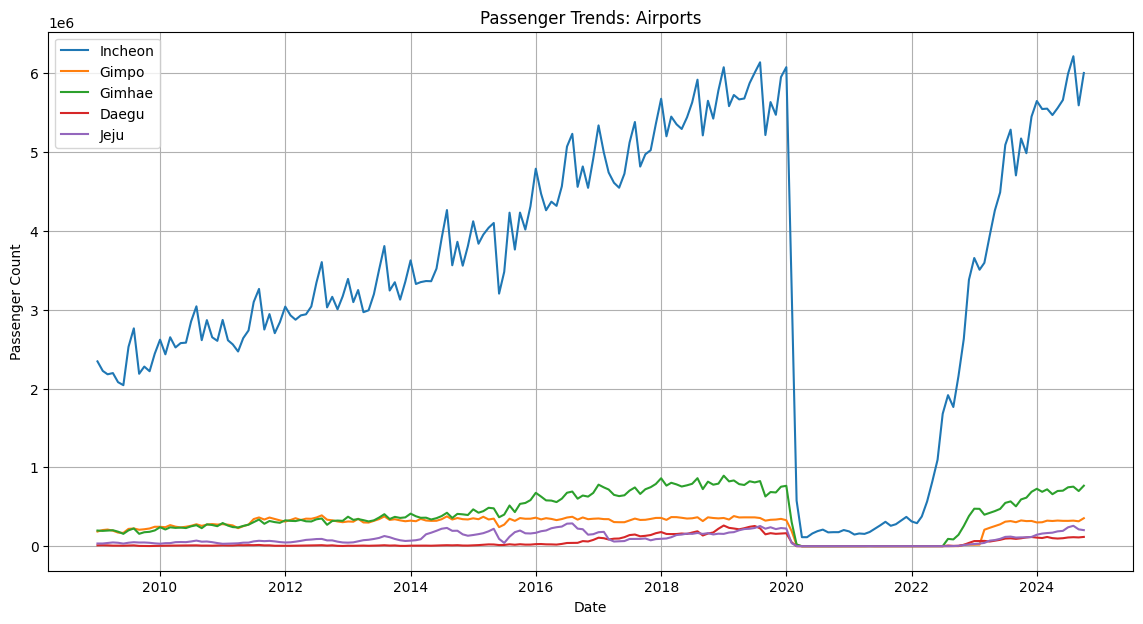

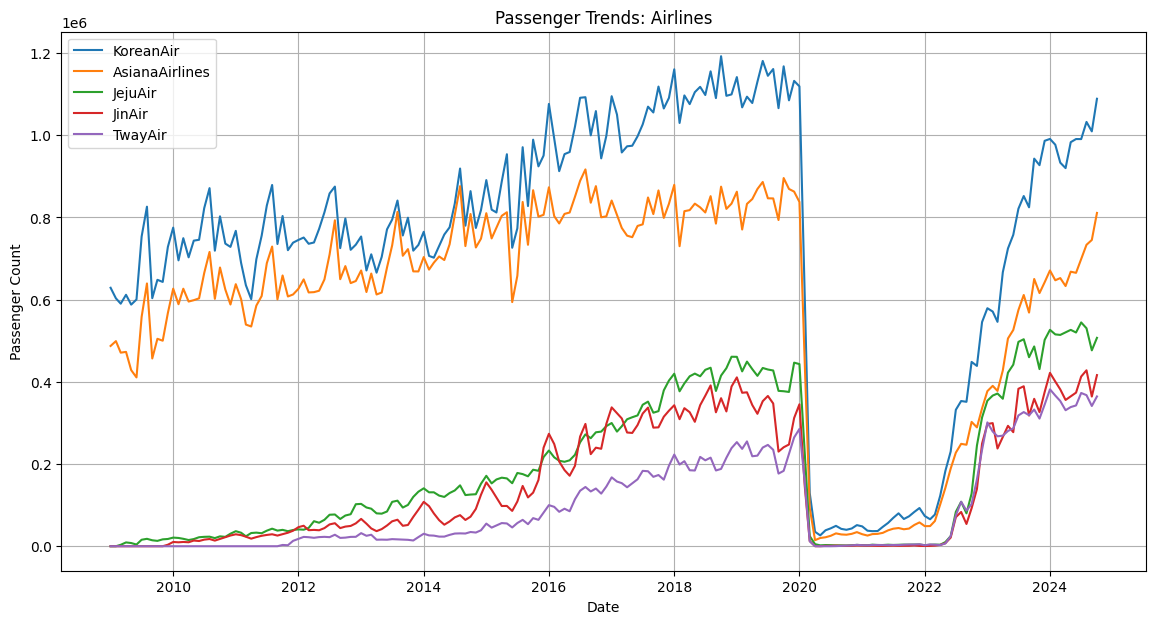

In [ ]:
data['Date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
data.set_index('Date', inplace=True)

import matplotlib.pyplot as plt

airports = ['Incheon', 'Gimpo', 'Gimhae', 'Daegu', 'Jeju']
airlines = ['KoreanAir', 'AsianaAirlines', 'JejuAir', 'JinAir', 'TwayAir']

plt.figure(figsize=(14, 7))
for airport in airports:
    plt.plot(data.index, data[airport], label=airport)
plt.title("Passenger Trends: Airports")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for airline in airlines:
    plt.plot(data.index, data[airline], label=airline)
plt.title("Passenger Trends: Airlines")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.grid(True)
plt.show()

## 인천공항


In [ ]:
df_incheon=data[['Incheon', 'IsHoliday', 'USD', 'JPY', 'COVID19']]
airport_train = df_incheon[0:168]; airport_valid = df_incheon[168:]
train_data = pd.Series(np.array(airport_train['Incheon']), index=pd.date_range('2009-01-01', periods=168, freq='M'))
test_data = pd.Series(np.array(airport_valid['Incheon']), index=pd.date_range('2023-01-01', periods=22, freq='M'))
exog_list = ['IsHoliday', 'USD', 'JPY', 'COVID19']
n = len(exog_list)
exog_train = []
exog_valid = []
for i in range(n):
    exog_series_train = pd.Series(np.array(airport_train[exog_list[i]]), index=pd.date_range('2009-01-01', periods=168, freq='M'))
    exog_series_valid = pd.Series(np.array(airport_valid[exog_list[i]]), index=pd.date_range('2023-01-01', periods=22, freq='M'))

    exog_train = exog_train + [exog_series_train]
    exog_valid = exog_valid + [exog_series_valid]


<ipython-input-9-423eb0d91eb0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_data = pd.Series(np.array(airport_train['Incheon']), index=pd.date_range('2009-01-01', periods=168, freq='M'))
<ipython-input-9-423eb0d91eb0>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_data = pd.Series(np.array(airport_valid['Incheon']), index=pd.date_range('2023-01-01', periods=22, freq='M'))
<ipython-input-9-423eb0d91eb0>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_train = pd.Series(np.array(airport_train[exog_list[i]]), index=pd.date_range('2009-01-01', periods=168, freq='M'))
<ipython-input-9-423eb0d91eb0>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_valid = pd.Series(np.array(airport_valid[exog_list[i]]), index=pd.date_range('2023-01-0

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarimax_model = auto_arima(
    train_data,
    X=np.array(exog_train).T,  # 외생 변수
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarimax_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=4673.112, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4737.748, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4662.668, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4672.864, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5368.839, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4676.657, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4661.895, Time=1.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=4663.891, Time=4.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=4662.294, Time=2.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4740.301, Time=1.79 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4663.415, Time=1.43 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4662.976, Time=1.43 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=4674.755, Time=2.09 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=4664.695, Time=4.38 sec
 ARIMA(1,0,0)(2,1,0

공휴일유무와 엔화의 환율은 유효한 변수라고 보기 어려움
이에 제거

In [ ]:
exog_list = ['USD', 'COVID19'] # 공휴일, 엔화 환율 삭제
n = len(exog_list)
exog_train = []
exog_valid = []
for i in range(n):
    exog_series_train = pd.Series(np.array(airport_train[exog_list[i]]), index=pd.date_range('2019-01-01', periods=168, freq='M'))
    exog_series_valid = pd.Series(np.array(airport_valid[exog_list[i]]), index=pd.date_range('2023-01-01', periods=22, freq='M'))

    exog_train = exog_train + [exog_series_train]
    exog_valid = exog_valid + [exog_series_valid]

<ipython-input-125-1d3a2b5c96f7>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_train = pd.Series(np.array(airport_train[exog_list[i]]), index=pd.date_range('2019-01-01', periods=168, freq='M'))
<ipython-input-125-1d3a2b5c96f7>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_valid = pd.Series(np.array(airport_valid[exog_list[i]]), index=pd.date_range('2023-01-01', periods=22, freq='M'))


In [ ]:
sarimax_model = auto_arima(
    train_data,
    X=np.array(exog_train).T,  # 외생 변수
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarimax_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4477.635, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5129.903, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4458.858, Time=1.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4421.079, Time=3.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4476.089, Time=0.89 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4429.833, Time=0.61 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4429.420, Time=0.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4453.119, Time=0.25 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4430.803, Time=2.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4443.002, Time=0.21 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4430.916, Time=0.62 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4432.000, Time=0.56 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4432.893, Time=0.43 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=4433.747, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1

In [ ]:
sarima_model = auto_arima(
    train_data,
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=4518.138, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4905.694, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4519.300, Time=1.70 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4788.766, Time=0.79 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4904.406, Time=0.07 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=4492.178, Time=1.20 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4470.581, Time=1.28 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=4466.877, Time=1.86 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=4466.851, Time=0.76 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=4464.863, Time=0.43 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=4466.861, Time=0.99 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=4491.044, Time=0.30 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=4465.620, Time=0.59 sec
 ARIMA(1,0,2)(0,1,1)[12]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

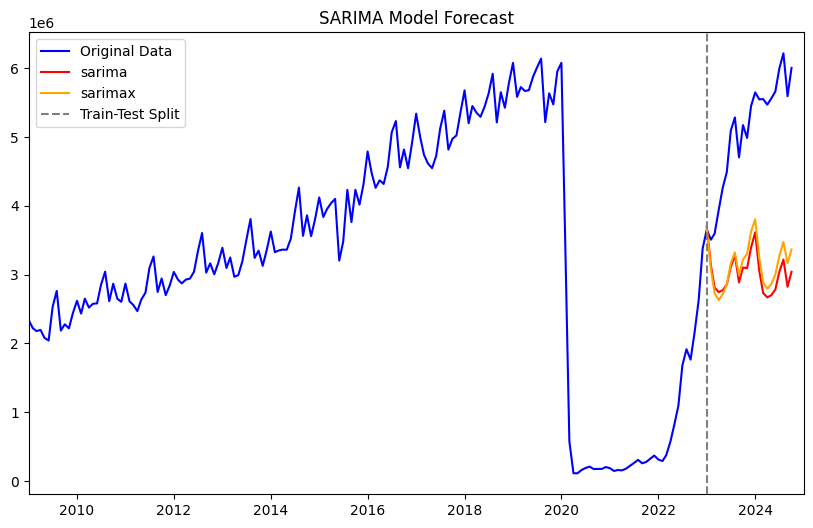

In [ ]:
### sarimax + sarima

order=(0, 1, 1)
seasonal_order = (0, 1, 1, 12)

sarimax_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=np.array(exog_train).T)
fitted_model_sarimax = sarimax_model.fit()
train_size = len(train_data)
forecast_steps = len(test_data)
forecast_sarimax = fitted_model_sarimax.forecast(steps=forecast_steps, exog=np.array(exog_valid).T)

order=(1, 0, 1)
seasonal_order = (0, 1, 1, 12)

sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
fitted_model_sarima = sarima_model.fit()
forecast_sarima = fitted_model_sarima.forecast(steps=forecast_steps)


plt.figure(figsize=(10, 6))
plt.plot(df_incheon.index, df_incheon['Incheon'], label='Original Data', color='blue')
plt.plot(df_incheon.index[168:], forecast_sarima, label='sarima', color='red')
plt.plot(df_incheon.index[168:], forecast_sarimax, label='sarimax', color='orange')
plt.xlim(pd.Timestamp('2009-01-01'), pd.Timestamp('2024-12-31'))
plt.axvline(x=pd.Timestamp('2022-12-31'), color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_sarima = mean_squared_error(test_data, forecast_sarima, squared=False)
rmse_sarimax = mean_squared_error(test_data, forecast_sarimax, squared=False)

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMAX RMSE: {rmse_sarimax:.2f}")

SARIMA RMSE: 2205748.42
SARIMAX RMSE: 2058144.92


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


좋지 않은 결과를 보이므로 다른 접근 시도

In [ ]:
!pip install -U cmdstanpy
!pip install prophet

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpccn2eojz/sdl6i1bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpccn2eojz/ztpcokl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12362', 'data', 'file=/tmp/tmpccn2eojz/sdl6i1bp.json', 'init=/tmp/tmpccn2eojz/ztpcokl8.json', 'output', 'file=/tmp/tmpccn2eojz/prophet_modelj1552bv0/prophet_model-20241127153140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-39-cab985eddcb8>:19: Futu

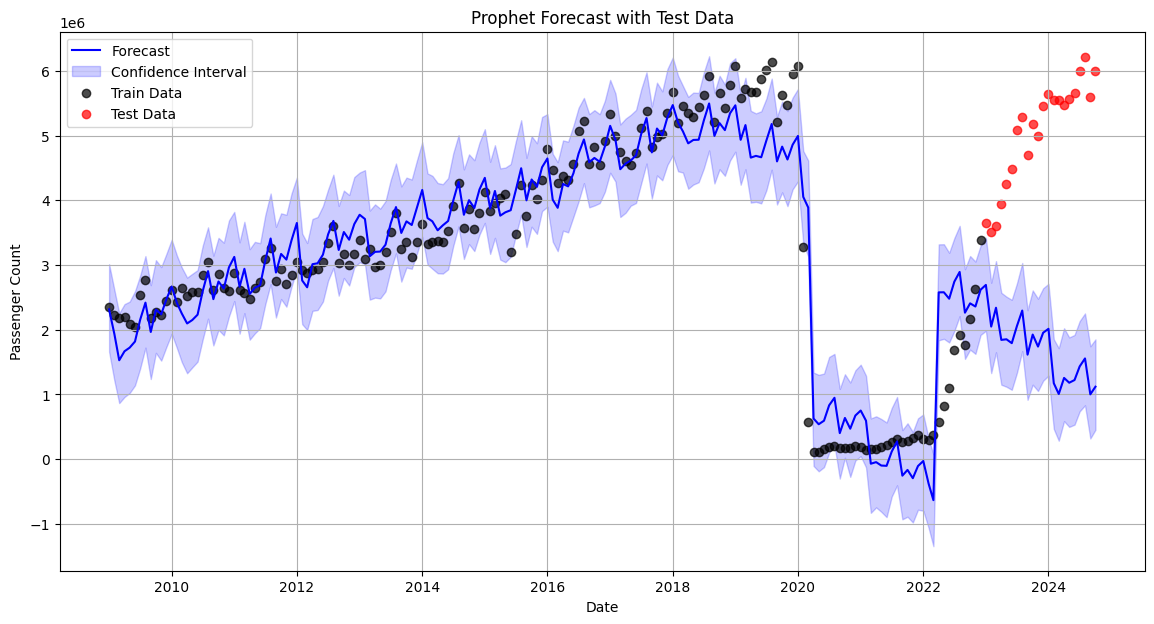

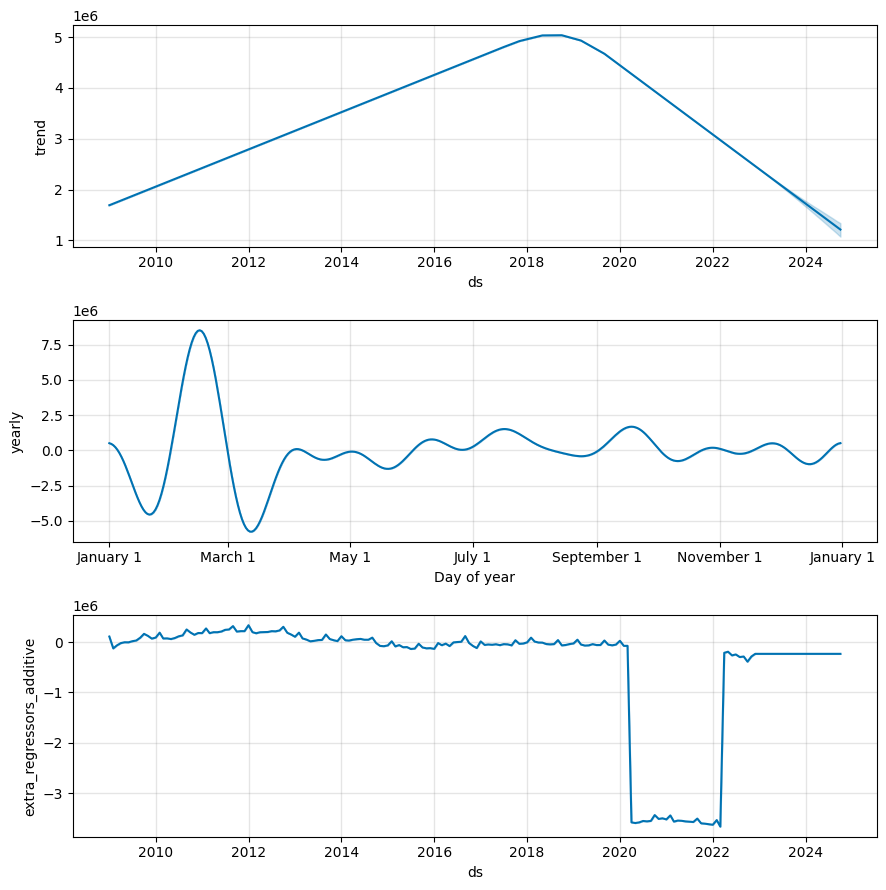

In [ ]:
prophet_train=airport_train.copy()
prophet_test=airport_valid.copy()

prophet_test = prophet_test.reset_index()
prophet_test.rename(columns={'Date': 'ds', 'Incheon': 'y'}, inplace=True)

prophet_train = prophet_train.reset_index()
prophet_train.rename(columns={'Date': 'ds', 'Incheon': 'y'}, inplace=True)

model = Prophet()
model.add_regressor('IsHoliday')
model.add_regressor('USD')
model.add_regressor('JPY')
model.add_regressor('COVID19')
model.fit(prophet_train)

future = model.make_future_dataframe(periods=22, freq='MS')
future = pd.merge(future, prophet_train[['ds', 'IsHoliday', 'USD', 'JPY', 'COVID19']], on='ds', how='left')
future.fillna(method='ffill', inplace=True)

forecast = model.predict(future)


plt.figure(figsize=(14, 7))

plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')  # 신뢰 구간

plt.scatter(prophet_train['ds'], prophet_train['y'], color='black', label='Train Data', alpha=0.7)

plt.scatter(prophet_test['ds'], prophet_test['y'], color='red', label='Test Data', alpha=0.7)

plt.title('Prophet Forecast with Test Data')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

model.plot_components(forecast)
plt.show()

In [ ]:
actual_test_values = prophet_test['y'].values

forecast_test_values = forecast.loc[forecast['ds'].isin(prophet_test['ds']), 'yhat'].values


rmse = np.sqrt(mean_squared_error(actual_test_values, forecast_test_values))
print(f"RMSE: {rmse}")

RMSE: 3568175.454574165


6


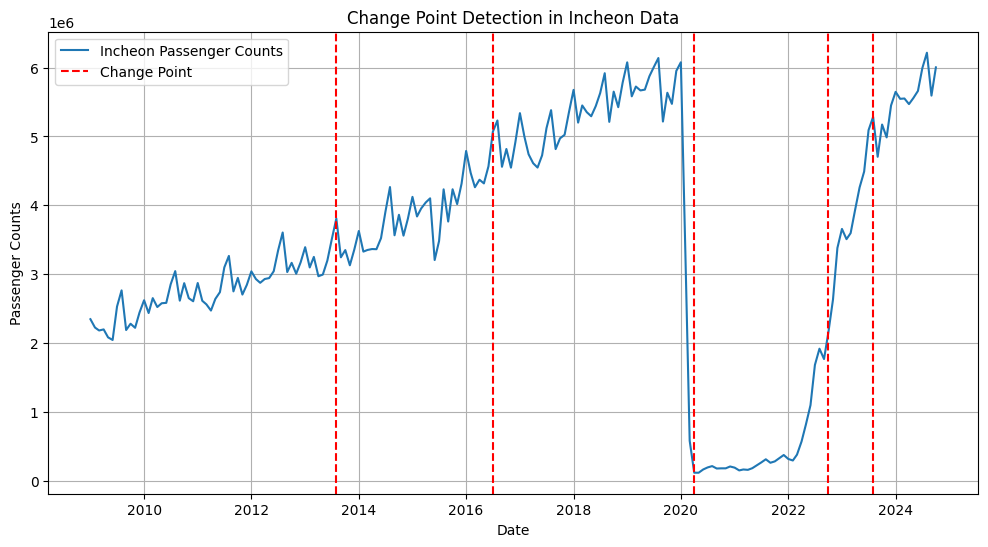

Detected Change Points: [Timestamp('2013-08-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


In [ ]:
#change point detection
df_incheon['Incheon']

signal = df_incheon["Incheon"].values
penalty = 5

algo = rpt.Pelt(model="rbf").fit(signal)
breakpoints = algo.predict(pen=penalty)

print(len(breakpoints))

plt.figure(figsize=(12, 6))
plt.plot(df_incheon.index, signal, label="Incheon Passenger Counts")
for bp in breakpoints[:-1]:
    plt.axvline(df_incheon.index[bp], color="red", linestyle="--", label="Change Point" if bp == breakpoints[0] else None)
plt.title("Change Point Detection in Incheon Data")
plt.xlabel("Date")
plt.ylabel("Passenger Counts")
plt.legend()
plt.grid()
plt.show()

change_point_dates = [df_incheon.index[bp] for bp in breakpoints[:-1]]
print("Detected Change Points:", change_point_dates)

In [ ]:
#short period sarimax  2009.1 - 2020.3

airport_train_st = df_incheon[0:120]; airport_valid_st = df_incheon[120:135]
train_data_st = pd.Series(np.array(airport_train_st['Incheon']), index=pd.date_range('2009-01-01', periods=120, freq='M'))
test_data_st = pd.Series(np.array(airport_valid_st['Incheon']), index=pd.date_range('2019-01-01', periods=15, freq='M'))
exog_list_st = ['IsHoliday', 'USD', 'JPY']
n = len(exog_list_st)
exog_train_st = []
exog_valid_st = []
for i in range(n):
    exog_series_train_st = pd.Series(np.array(airport_train_st[exog_list_st[i]]), index=pd.date_range('2009-01-01', periods=120, freq='M'))
    exog_series_valid_st = pd.Series(np.array(airport_valid_st[exog_list_st[i]]), index=pd.date_range('2019-01-01', periods=15, freq='M'))

    exog_train_st = exog_train_st + [exog_series_train_st]
    exog_valid_st = exog_valid_st + [exog_series_valid_st]


<ipython-input-13-cbe0e5fc1327>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_data_st = pd.Series(np.array(airport_train_st['Incheon']), index=pd.date_range('2009-01-01', periods=120, freq='M'))
<ipython-input-13-cbe0e5fc1327>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_data_st = pd.Series(np.array(airport_valid_st['Incheon']), index=pd.date_range('2019-01-01', periods=15, freq='M'))
<ipython-input-13-cbe0e5fc1327>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_train_st = pd.Series(np.array(airport_train_st[exog_list_st[i]]), index=pd.date_range('2009-01-01', periods=120, freq='M'))
<ipython-input-13-cbe0e5fc1327>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_valid_st = pd.Series(np.array(airport_valid_st[exog_list_st[i]

In [ ]:
from pmdarima import auto_arima
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model_st = auto_arima(
    train_data_st,
    X=np.array(exog_train_st).T,  # 외생 변수
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarimax_model_st.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2956.056, Time=2.79 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3009.214, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2934.122, Time=3.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3001.758, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3518.621, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2955.816, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2929.722, Time=3.10 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3020.364, Time=1.49 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2930.455, Time=7.16 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=3030.764, Time=3.76 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3003.655, Time=2.69 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=3007.825, Time=7.37 sec
 ARIMA(1,0,0)(2,1,0)[12]     

In [ ]:
exog_list_st = ['JPY']
n = len(exog_list_st)
exog_train_st = []
exog_valid_st = []
for i in range(n):
    exog_series_train_st = pd.Series(np.array(airport_train_st[exog_list_st[i]]), index=pd.date_range('2009-01-01', periods=120, freq='M'))
    exog_series_valid_st = pd.Series(np.array(airport_valid_st[exog_list_st[i]]), index=pd.date_range('2019-01-01', periods=15, freq='M'))

    exog_train_st = exog_train_st + [exog_series_train_st]
    exog_valid_st = exog_valid_st + [exog_series_valid_st]


sarimax_model_st = auto_arima(
    train_data_st,
    X=np.array(exog_train_st).T,  # 외생 변수
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarimax_model_st.summary())

Performing stepwise search to minimize aic


<ipython-input-15-2400fec8f13f>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_train_st = pd.Series(np.array(airport_train_st[exog_list_st[i]]), index=pd.date_range('2009-01-01', periods=120, freq='M'))
<ipython-input-15-2400fec8f13f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_series_valid_st = pd.Series(np.array(airport_valid_st[exog_list_st[i]]), index=pd.date_range('2019-01-01', periods=15, freq='M'))


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2956.312, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3007.953, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2934.954, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2965.917, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3519.246, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2955.729, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2930.978, Time=2.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3024.052, Time=0.42 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2931.758, Time=2.54 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2931.599, Time=2.95 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2992.125, Time=0.67 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=2937.902, Time=7.91 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=2940.453, Time=2.01 sec

Best

In [ ]:
sarima_model_st = auto_arima(
    train_data_st,
    seasonal=True,
    m=12,  # 계절 주기
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=None, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(sarima_model_st.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2935.714, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2924.234, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2913.081, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2936.987, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2912.799, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2924.254, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=2914.408, Time=0.76 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=2914.527, Time=1.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2912.536, Time=0.53 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2912.085, Time=0.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2911.625, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2910.013, Time=0.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2921.150, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]

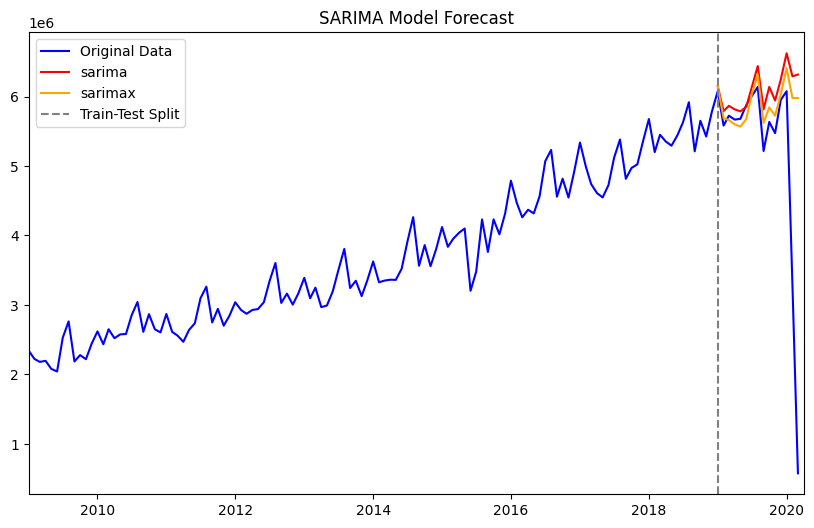

In [ ]:
##sarimax + sarima

order=(1, 0, 0)
seasonal_order = (2, 1, 0, 12)

sarimax_model_st = SARIMAX(train_data_st, order=order, seasonal_order=seasonal_order, exog=np.array(exog_train_st).T)
fitted_model_sarimax_st = sarimax_model_st.fit()
train_size = len(train_data_st)
forecast_steps = len(test_data_st)
forecast_sarimax_st = fitted_model_sarimax_st.forecast(steps=forecast_steps, exog=np.array(exog_valid_st).T)

order=(0, 1, 0)
seasonal_order = (1, 1, 2, 12)

sarima_model_st = SARIMAX(train_data_st, order=order, seasonal_order=seasonal_order)
fitted_model_sarima_st = sarima_model_st.fit()
forecast_sarima_st = fitted_model_sarima_st.forecast(steps=forecast_steps)


plt.figure(figsize=(10, 6))
plt.plot(df_incheon.index[0:135], df_incheon[0:135]['Incheon'], label='Original Data', color='blue')
plt.plot(df_incheon.index[120:135], forecast_sarima_st, label='sarima', color='red')
plt.plot(df_incheon.index[120:135], forecast_sarimax_st, label='sarimax', color='orange')
plt.xlim(pd.Timestamp('2009-01-01'), pd.Timestamp('2020-03-31'))
plt.axvline(x=pd.Timestamp('2018-12-31'), color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

In [ ]:
rmse_sarima = mean_squared_error(test_data_st, forecast_sarima_st, squared=False)
rmse_sarimax = mean_squared_error(test_data_st, forecast_sarimax_st, squared=False)

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMAX RMSE: {rmse_sarimax:.2f}")

SARIMA RMSE: 1701725.53
SARIMAX RMSE: 1569696.91


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 변화점 탐지

In [ ]:
df = pd.read_csv("/content/drive/My Drive/merged_monthly_passenger_data.csv", encoding="utf-8")
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('Date', inplace=True)

In [ ]:
import ruptures as rpt
import matplotlib.pyplot as plt


def change_point_detection(data, column_name, penalty=5, model="rbf"):
  signal = data[column_name].values
  algo = rpt.Pelt(model=model).fit(signal)
  breakpoints = algo.predict(pen=penalty)
  change_point_dates = [data.index[bp] for bp in breakpoints[:-1]]

  plt.figure(figsize=(12, 6))
  plt.plot(data.index, signal, label=f"{column_name} Counts")
  for bp in breakpoints[:-1]:
      plt.axvline(data.index[bp], color="red", linestyle="--", label="Change Point" if bp == breakpoints[0] else None)
  plt.title(f"Change Point Detection in {column_name} Data")
  plt.xlabel("Date")
  plt.ylabel("Counts")
  plt.legend()
  plt.grid()
  plt.show()

  print(f"Detected Change Points ({len(change_point_dates)}):", change_point_dates)

  return change_point_dates

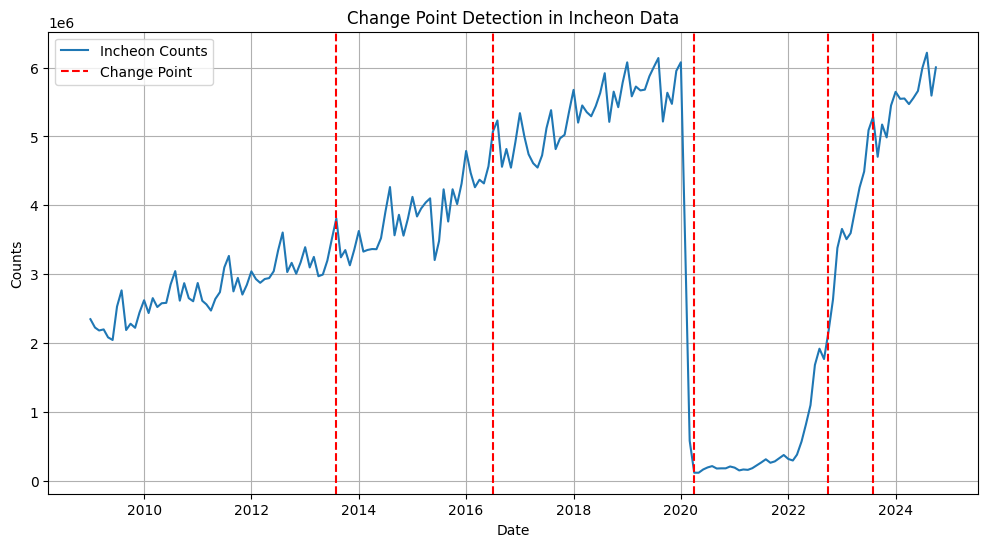

Detected Change Points (5): [Timestamp('2013-08-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


In [ ]:
change_point_Incheon = change_point_detection(data=df, column_name="Incheon", penalty=5)

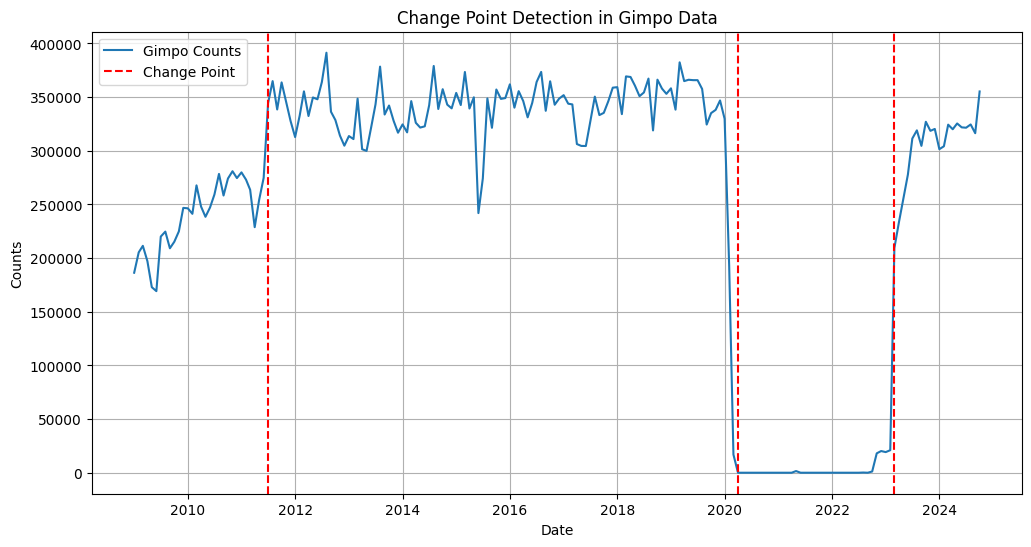

Detected Change Points (3): [Timestamp('2011-07-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2023-03-01 00:00:00')]


In [ ]:
change_point_Gimpo = change_point_detection(data=df, column_name="Gimpo", penalty=5)

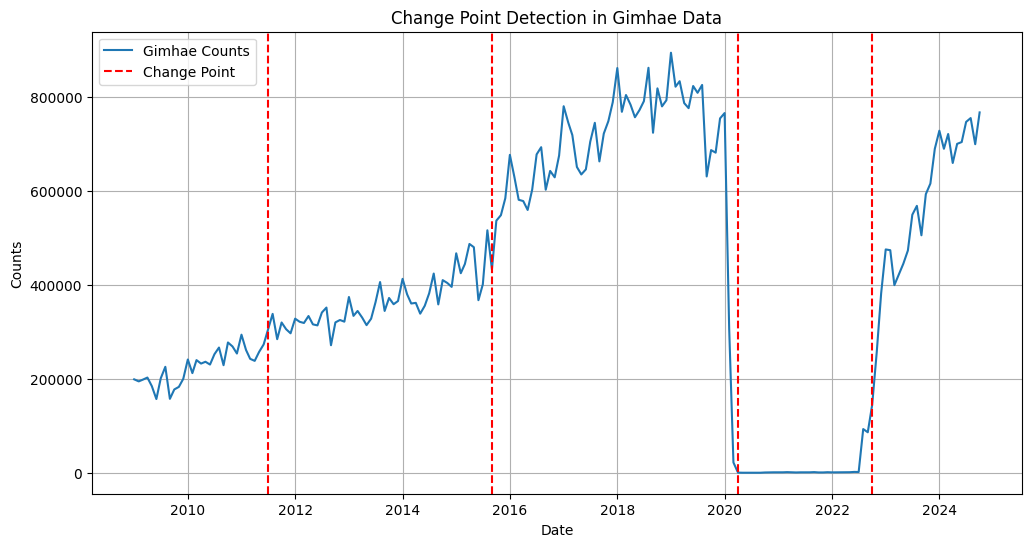

Detected Change Points (4): [Timestamp('2011-07-01 00:00:00'), Timestamp('2015-09-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00')]


In [ ]:
change_point_Gimhae = change_point_detection(data=df, column_name="Gimhae", penalty=5)

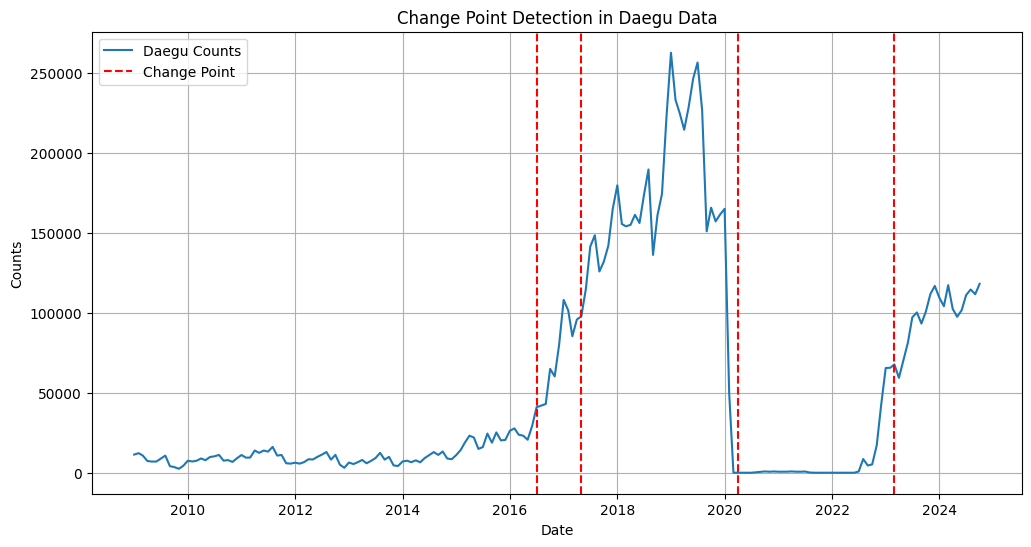

Detected Change Points (4): [Timestamp('2016-07-01 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2023-03-01 00:00:00')]


In [ ]:
change_point_Daegu = change_point_detection(data=df, column_name="Daegu", penalty=5)

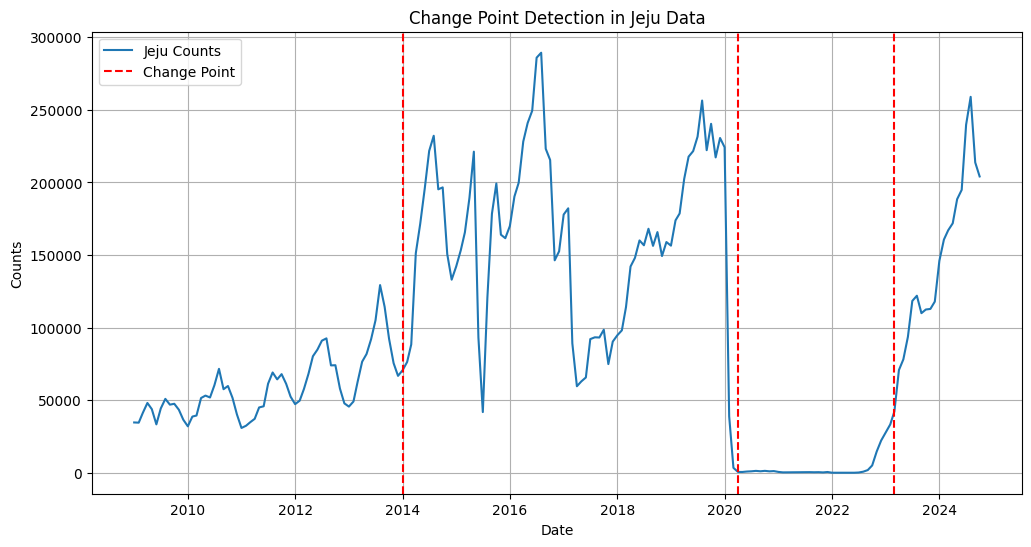

Detected Change Points (3): [Timestamp('2014-01-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2023-03-01 00:00:00')]


In [ ]:
change_point_Jeju = change_point_detection(data=df, column_name="Jeju", penalty=5)

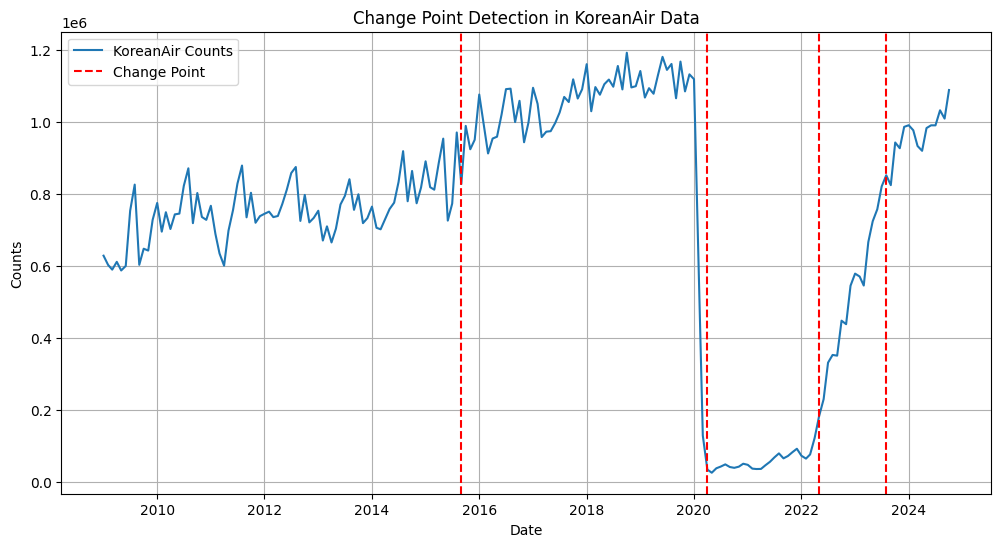

Detected Change Points (4): [Timestamp('2015-09-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-05-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


In [ ]:
change_point_KoreanAir = change_point_detection(data=df, column_name="KoreanAir", penalty=5)

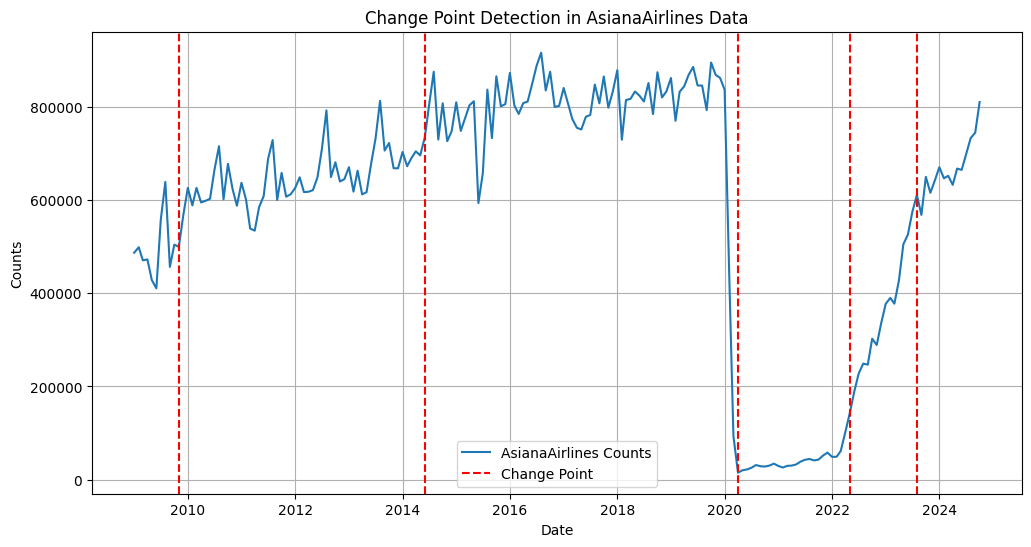

Detected Change Points (5): [Timestamp('2009-11-01 00:00:00'), Timestamp('2014-06-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-05-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


In [ ]:
change_point_AsianaAirlines = change_point_detection(data=df, column_name="AsianaAirlines", penalty=5)

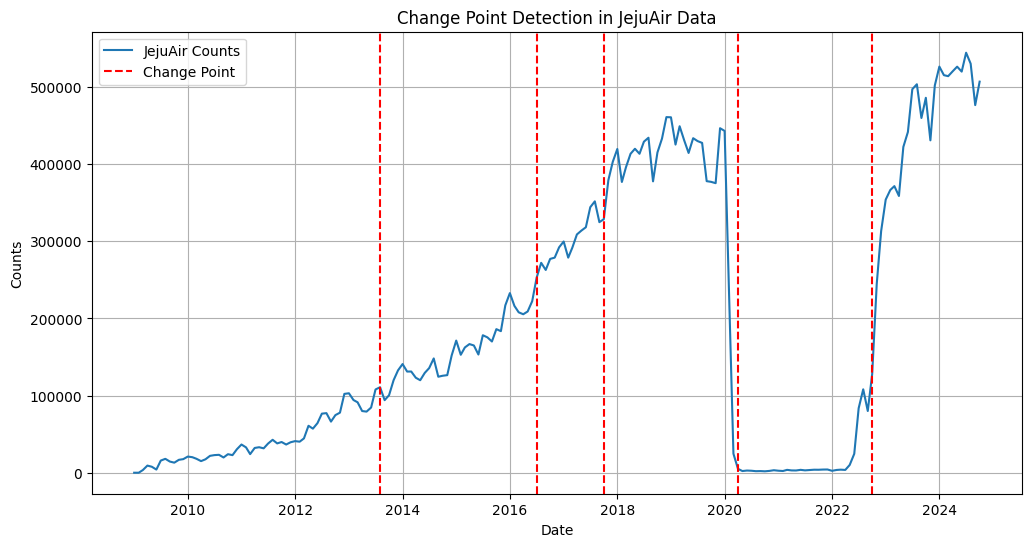

Detected Change Points (5): [Timestamp('2013-08-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2017-10-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00')]


In [ ]:
change_point_JejuAir = change_point_detection(data=df, column_name="JejuAir", penalty=5)

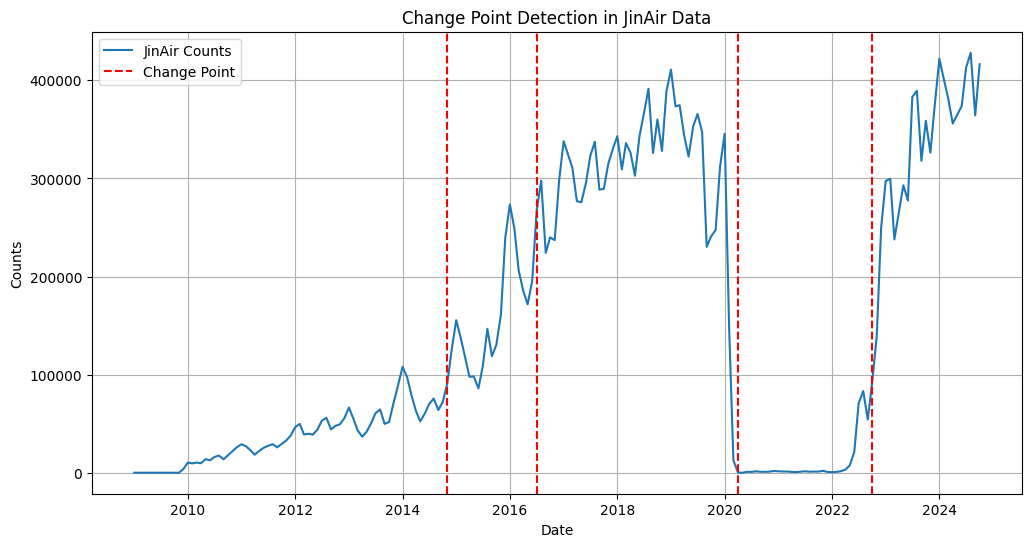

Detected Change Points (4): [Timestamp('2014-11-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00')]


In [ ]:
change_point_JinAir = change_point_detection(data=df, column_name="JinAir", penalty=5)

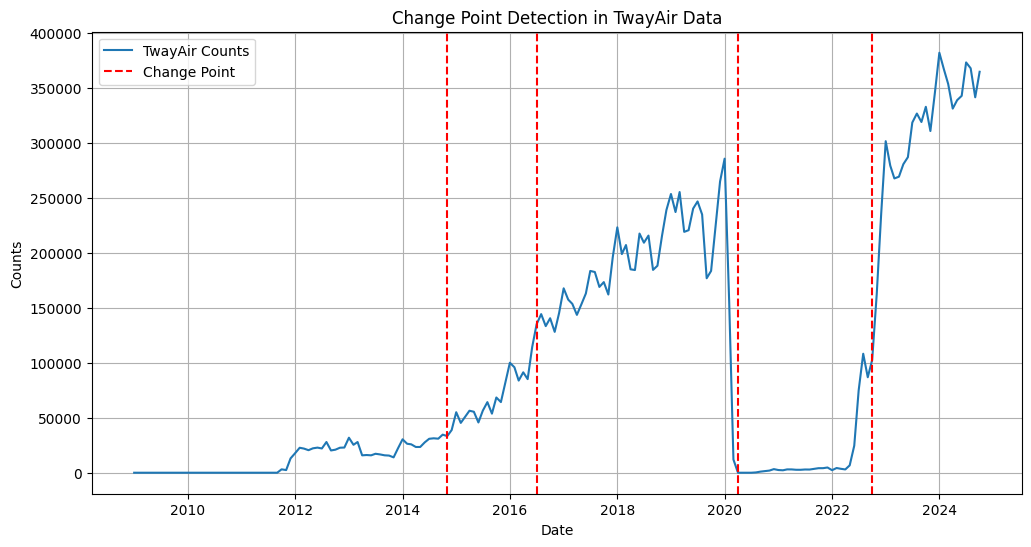

Detected Change Points (4): [Timestamp('2014-11-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2022-10-01 00:00:00')]


In [ ]:
change_point_TwayAir = change_point_detection(data=df, column_name="TwayAir", penalty=5)